In [42]:
from skimage.io import imread
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
%matplotlib inline

In [5]:
template = imread('trailer.png',as_grey = True)
photo = imread('u2cuba.jpg',as_grey = True)

In [8]:
col_img, row_img =photo.shape
col_tpl, row_tpl = template.shape

In [54]:
%time
cros_cor = [[0 for i in range(0,row_img - row_tpl)] for j in range(0,col_img-col_tpl)]
keep_max = 0
for i in range(0,col_img-col_tpl):
    for j in range(0,row_img - row_tpl):
        A = template.flatten()
        B = photo[i:(i+21),j:(j+22)].flatten()
        # np.corrcoef(A,B)
        cros_cor[i][j] = float(np.correlate(A,B))
        if cros_cor[i][j]>keep_max:
            keep_max = cros_cor[i][j]
            i_keep = i
            j_keep = j

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 16.9 µs


In [28]:
%%timeit
# 4.92 µs per loop
A = template.flatten()#.reshape(21*22)
B = photo[0:21,0:22].flatten()#.reshape(21*22)

# 6.75 µs per loop
# A = template.reshape(21*22)
# B = photo[0:21,0:22].reshape(21*22)
# np.corrcoef(A,B)
np.correlate(A,B)

The slowest run took 111.65 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.92 µs per loop


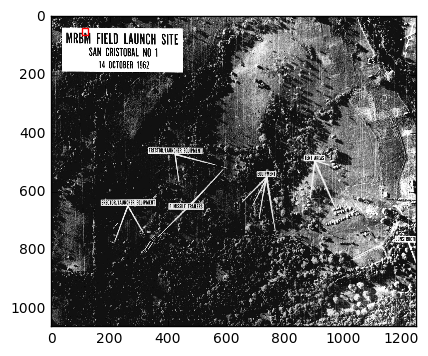

In [61]:
# plt.imshow()
# Create figure and axes
fig,ax = plt.subplots(1)
plt.figure(figsize=(8,8))
# Display the image
ax.imshow(photo,cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((i_keep,j_keep),col_tpl, row_tpl,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()


In [57]:
plt.imshow(cros_cor/87, cmap='gray')

TypeError: unsupported operand type(s) for /: 'list' and 'int'

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [56]:
type(cros_cor)

list